In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from feature_engine.imputation import CategoricalImputer,MeanMedianImputer

In [2]:
data_set = pd.read_csv('../../../../../../Machine Learning/case data/hose-price-prediction/train.csv',index_col='Id')
data_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
num_features = data_set.select_dtypes(include=np.number)
cat_features = data_set.select_dtypes(include=np.object)

In [5]:
(num_features.isna().mean()*100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
OpenPorchSF       0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
MSSubClass        0.000000
BedroomAbvGr      0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
EnclosedPorch     0.000000
FullBath          0.000000
HalfBath          0.000000
BsmtFinSF2        0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
BsmtHalfBath      0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
SalePrice         0.000000
d

In [6]:
(cat_features.isna().mean()*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493
Functional        0.000000
KitchenQual       0.000000
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
PavedDrive        0.000000
SaleType          0.000000
MSZoning          0.000000
Street            0.000000
Condition2        0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
Foundation        0.000000
HouseStyle        0.000000
RoofStyle         0.000000
R

In [8]:
# when feature missing values more than 60% dropping feature may be good way to deal with it.
data_set_c = data_set.drop(labels=['PoolQC','MiscFeature','Alley','Fence'],axis=1)
data_set_c.shape

(1460, 76)

In [12]:
imputer = MeanMedianImputer(imputation_method='mean', variables=['LotFrontage', 'MasVnrArea'])
imputer.fit(data_set_c)
imputer.imputer_dict_

{'LotFrontage': 70.04995836802665, 'MasVnrArea': 103.68526170798899}

In [13]:
data_set_c = imputer.transform(data_set_c)
data_set_c[['LotFrontage', 'MasVnrArea']].isna().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [14]:
imputer = MeanMedianImputer(imputation_method='median',variables=['GarageYrBlt'])
imputer.fit(data_set_c)
imputer.imputer_dict_

{'GarageYrBlt': 1980.0}

In [15]:
data_set_c = imputer.transform(data_set_c)
data_set_c['GarageYrBlt'].isna().sum()

0

In [16]:
imputer = CategoricalImputer(imputation_method='missing',variables='FireplaceQu')
imputer.fit(data_set_c)
imputer.imputer_dict_

{'FireplaceQu': 'Missing'}

In [17]:
data_set_c = imputer.transform(data_set_c)
data_set_c['FireplaceQu'].isna().sum()

0

In [18]:
imputer = CategoricalImputer(imputation_method='frequent',
                             variables=['GarageType','GarageCond','GarageQual','GarageFinish',
                                        'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond'])
imputer.fit(data_set_c)
imputer.imputer_dict_

{'GarageType': 'Attchd',
 'GarageCond': 'TA',
 'GarageQual': 'TA',
 'GarageFinish': 'Unf',
 'BsmtFinType2': 'Unf',
 'BsmtFinType1': 'Unf',
 'BsmtExposure': 'No',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA'}

In [19]:
data_set_c = imputer.transform(data_set_c)
data_set_c[['GarageType','GarageCond','GarageQual','GarageFinish',
            'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond']].isna().sum()

GarageType      0
GarageCond      0
GarageQual      0
GarageFinish    0
BsmtFinType2    0
BsmtFinType1    0
BsmtExposure    0
BsmtQual        0
BsmtCond        0
dtype: int64

In [20]:
imputer = CategoricalImputer(imputation_method='frequent',variables=['MasVnrType','Electrical'])
imputer.fit(data_set_c)
imputer.imputer_dict_

{'MasVnrType': 'None', 'Electrical': 'SBrkr'}

In [21]:
data_set_c = imputer.transform(data_set_c)
data_set_c[['MasVnrType','Electrical']].isna().sum()

MasVnrType    0
Electrical    0
dtype: int64

In [23]:
data_set_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [39]:
def compare_dist_(before,after):
    plt.subplots(nrows=1,ncols=1,figsize=[12,6],dpi=300)
    sns.kdeplot(x=before,fill=True,color='#FEA443',label='before')
    sns.kdeplot(x=after,color='#506AD4',label='after')
    plt.legend()
    plt.show()

In [50]:
def compare_hist_(before,after,discrete=None):
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=[24,6],dpi=300)
    sns.histplot(x=before,discrete=discrete,kde=True,color='#FEA443',label='before',ax=axes[0])
    sns.histplot(x=after,discrete=discrete,kde=True,color='#506AD4',label='after',ax=axes[1])
    plt.legend()
    plt.show()

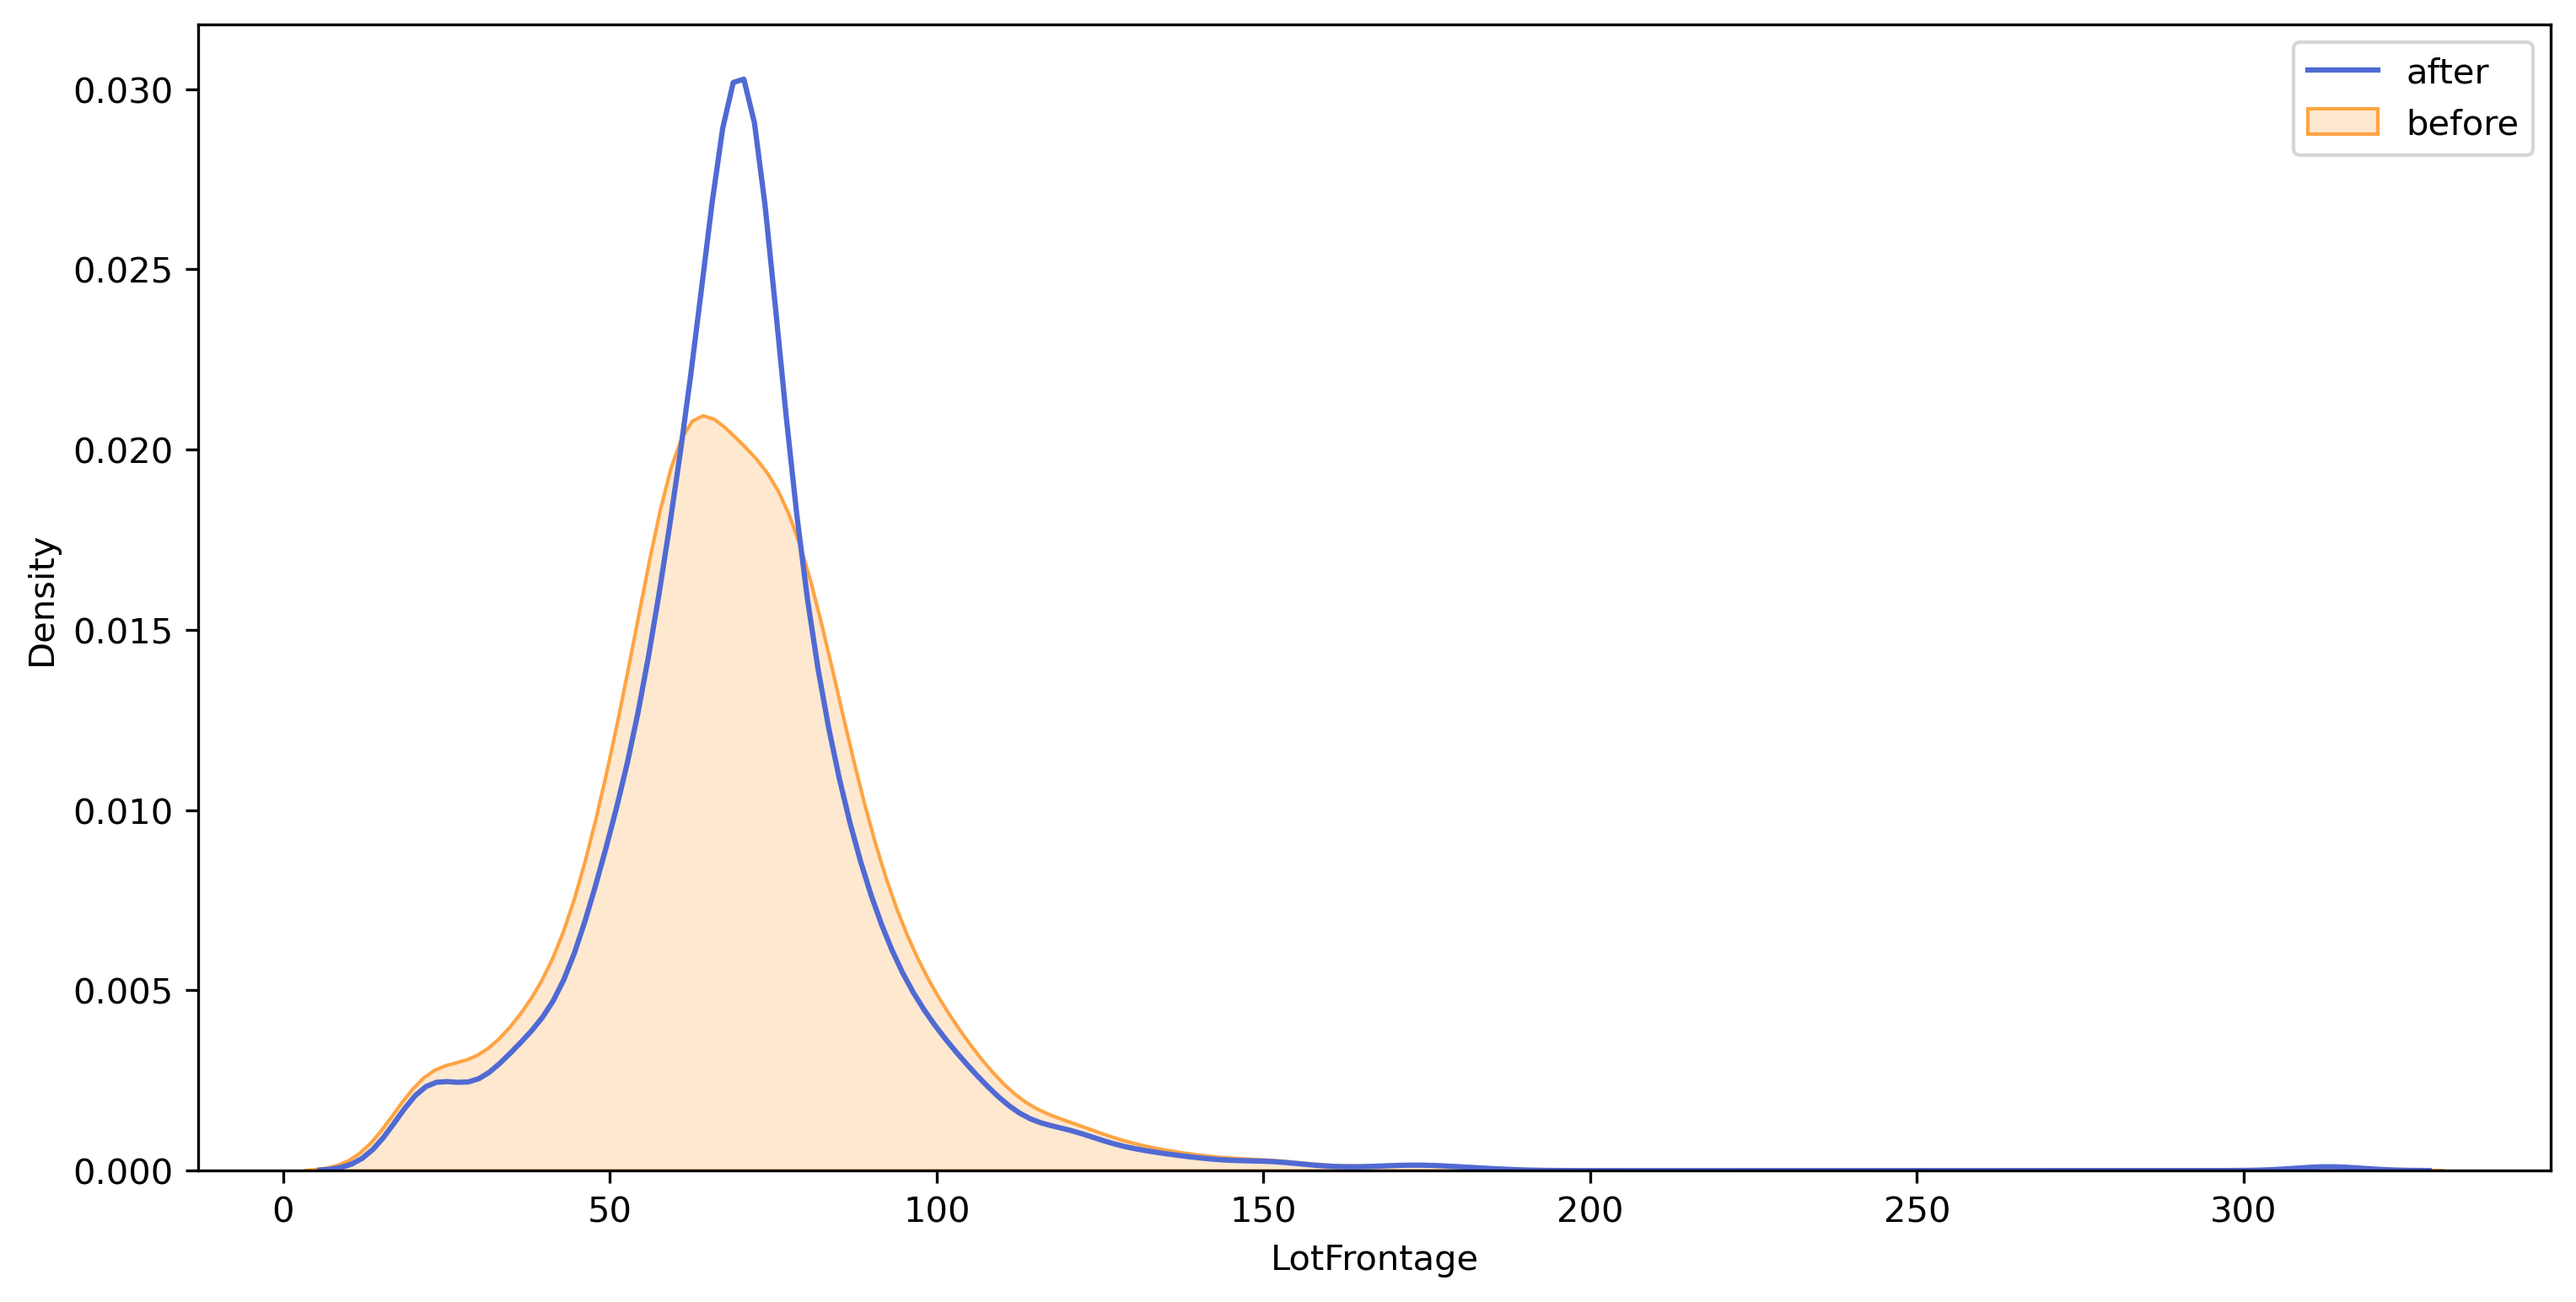

In [40]:
compare_dist_(data_set['LotFrontage'],data_set_c['LotFrontage'])

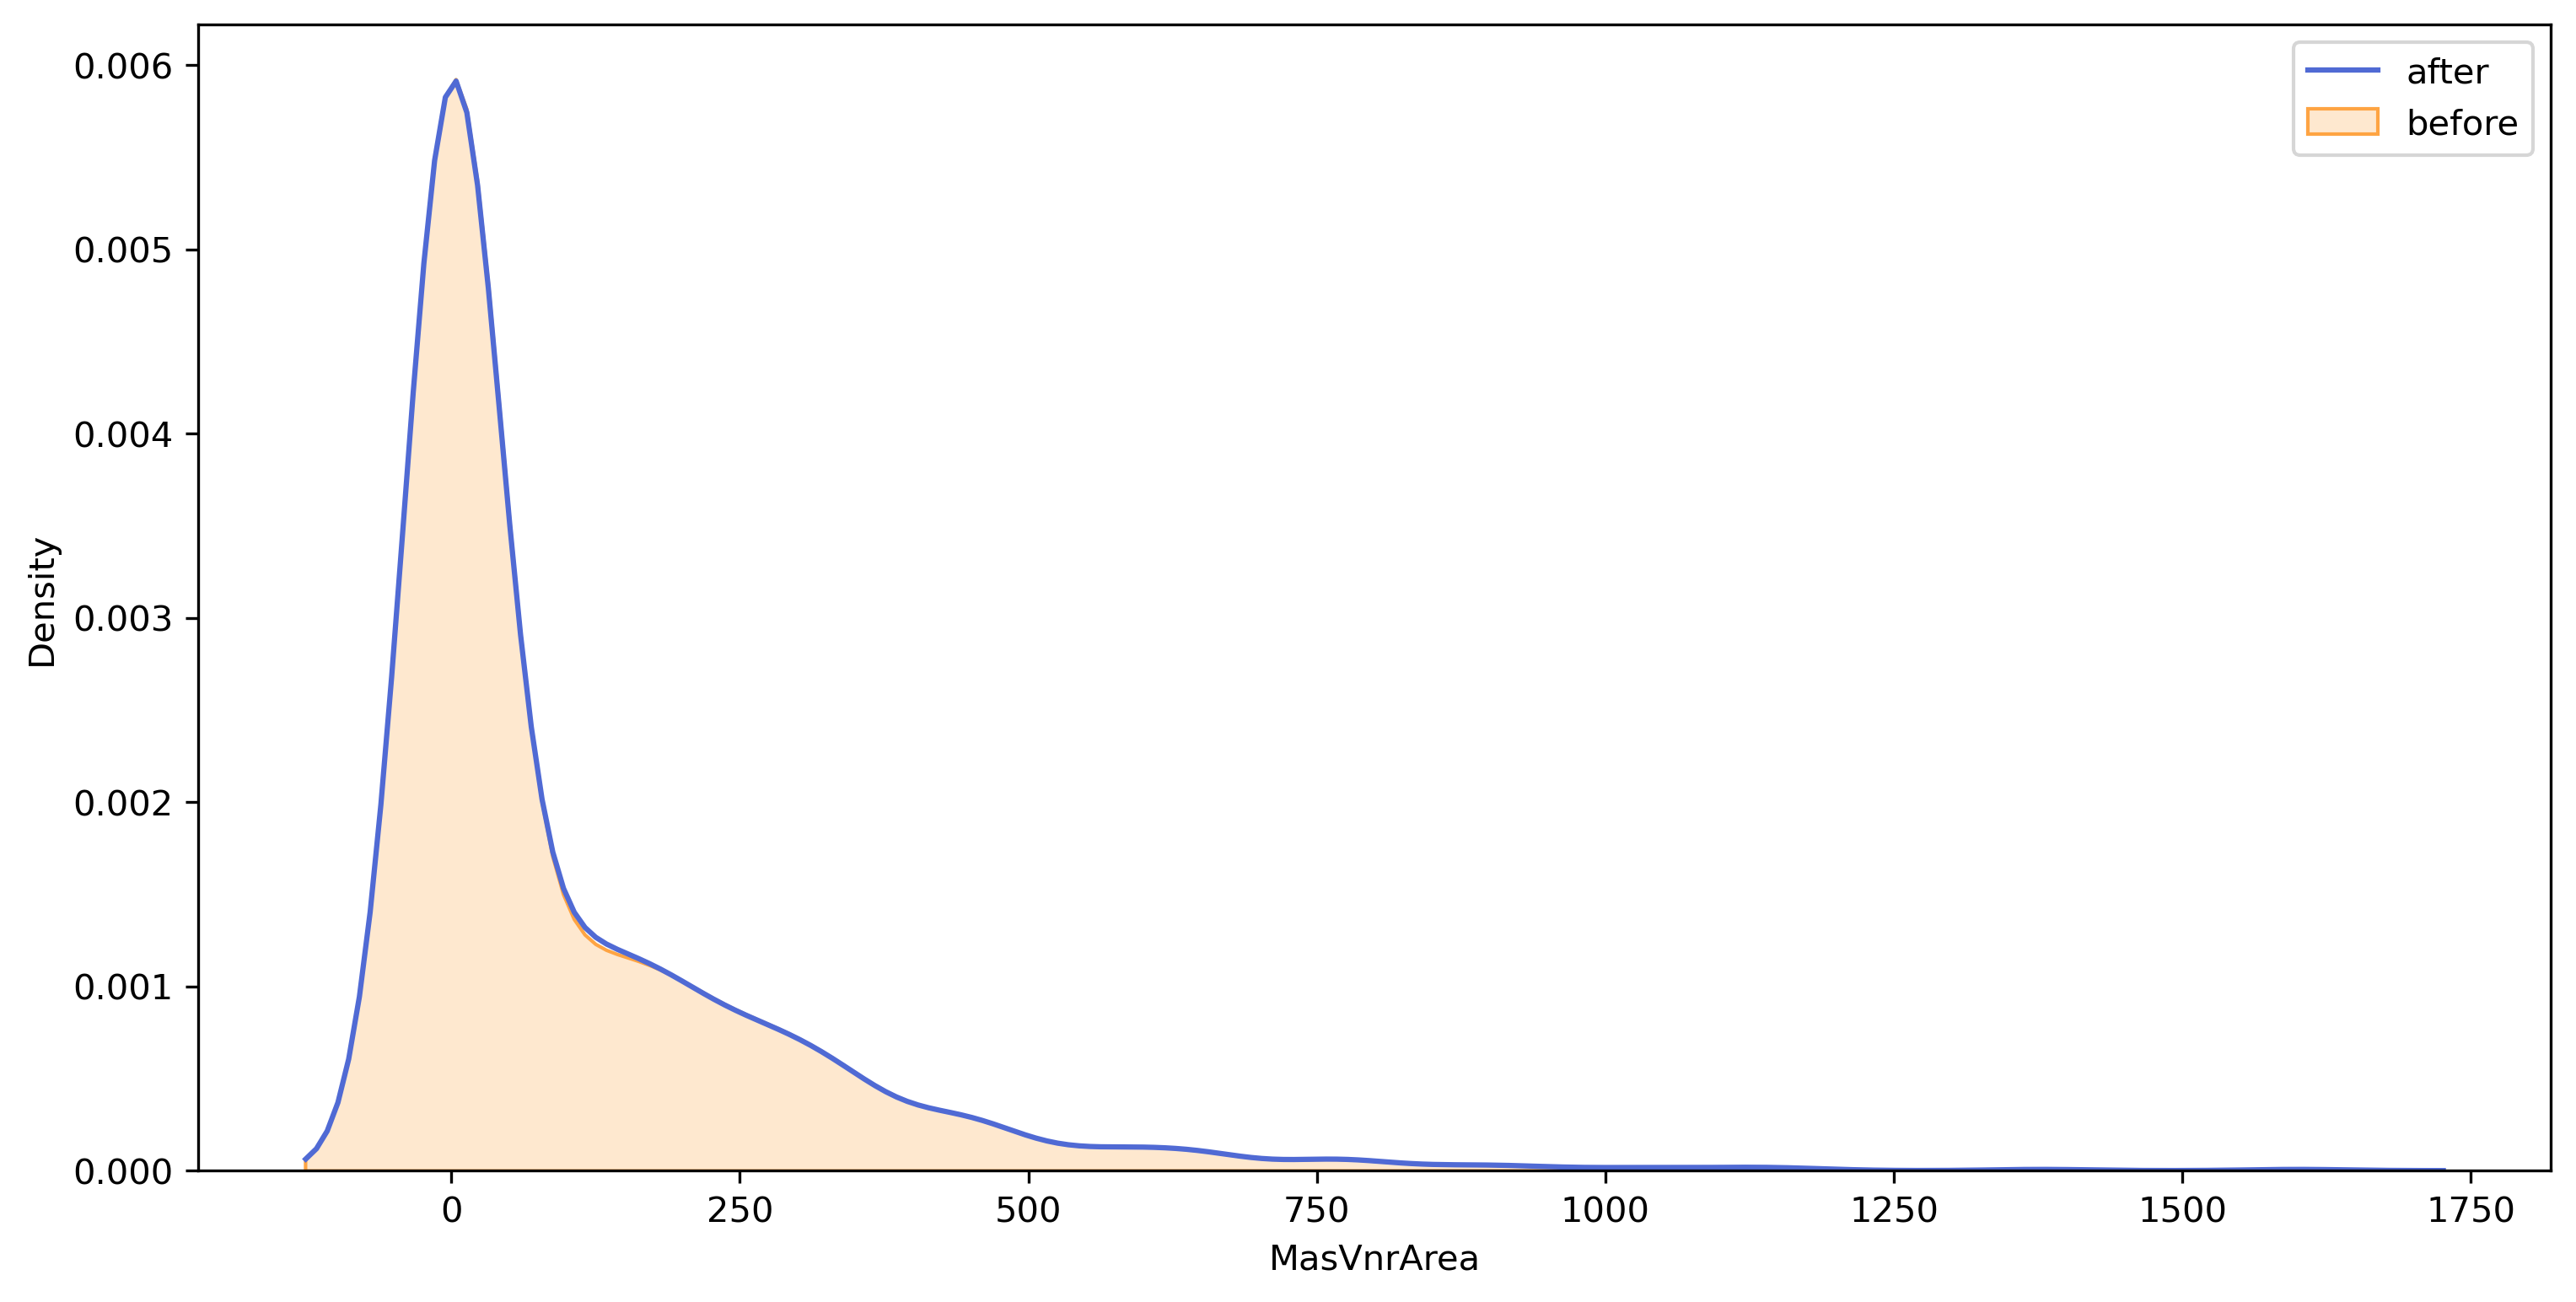

In [41]:
compare_dist_(data_set['MasVnrArea'],data_set_c['MasVnrArea'])

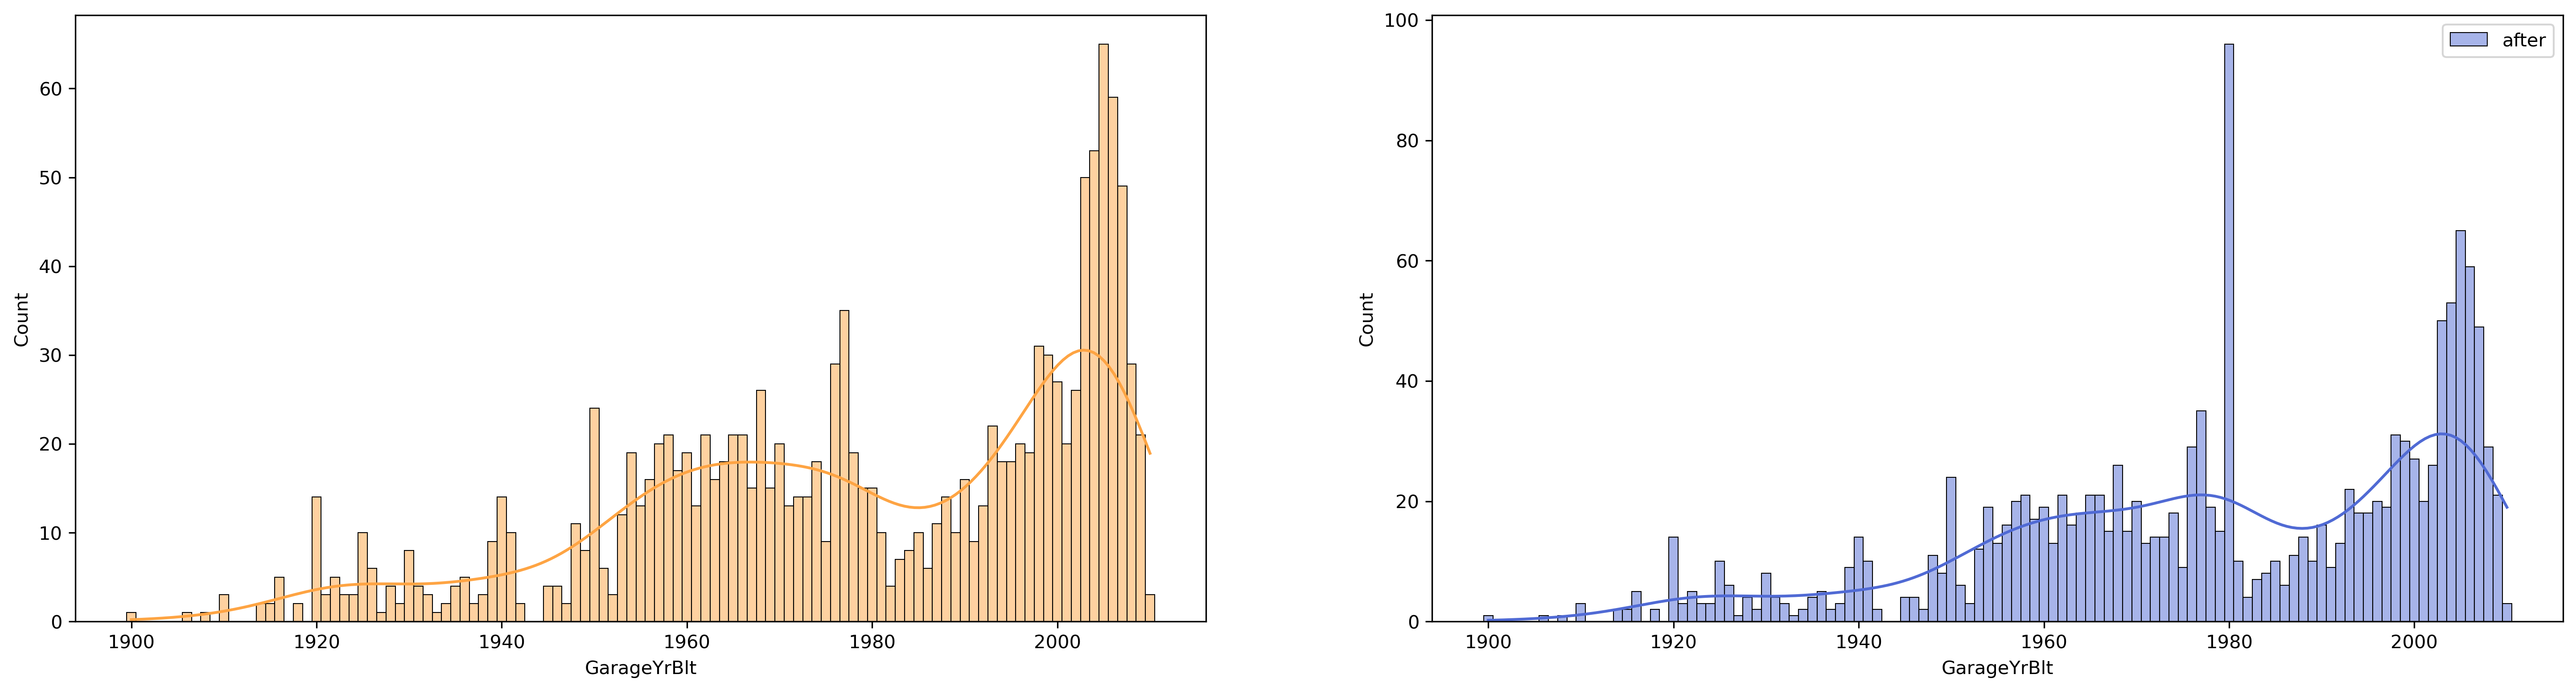

In [51]:
compare_hist_(data_set['GarageYrBlt'],data_set_c['GarageYrBlt'],discrete=True)